# Proyek Analisis Data: Bike Sharing
- **Nama:** Muh. Syuaib
- **Email:** msyuaib768@gmail.com
- **ID Dicoding:** muhsyuaib

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Pada jam berapa dan hari apa penggunaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor data yang telah diupload
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Menampilkan beberapa baris pertama dari dataset
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset day.csv mencatat jumlah peminjaman sepeda berdasarkan hari
- Dataset hour.csv mencatat peminjaman sepeda berdasarkan jam

### Assessing Data

In [3]:
# Menilai informasi dasar dari kedua dataset
print(df_day.info())
print(df_hour.info())

# Mengecek adanya nilai yang hilang (missing values)
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

# Menampilkan statistik deskriptif
print(df_day.describe())
print(df_hour.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak ada nilai yang hilang (missing values) dalam kedua dataset
- Dataset memiliki beberapa kolom dengan tipe data yang tidak sesuai, seperti tanggal yang masih berupa string, sehingga perlu dikonversi.

### Cleaning Data

In [4]:
# Mengubah kolom 'dteday' menjadi datetime untuk mempermudah analisis berbasis waktu
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Menghapus kolom yang tidak diperlukan (misalnya 'instant' dan 'windspeed')
df_day.drop(['instant'], axis=1, inplace=True)
df_hour.drop(['instant'], axis=1, inplace=True)

# Mengganti nama beberapa kolom agar lebih mudah dipahami
df_day.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'weekday': 'day_of_week',
                       'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
df_hour.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weekday': 'day_of_week',
                        'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)

**Insight:**
- Kolom instant dan windspeed dihapus karena tidak relevan dengan analisis yang akan dilakukan.
- Kolom dteday diubah menjadi tipe datetime untuk analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore Pola Penggunaan Sepeda

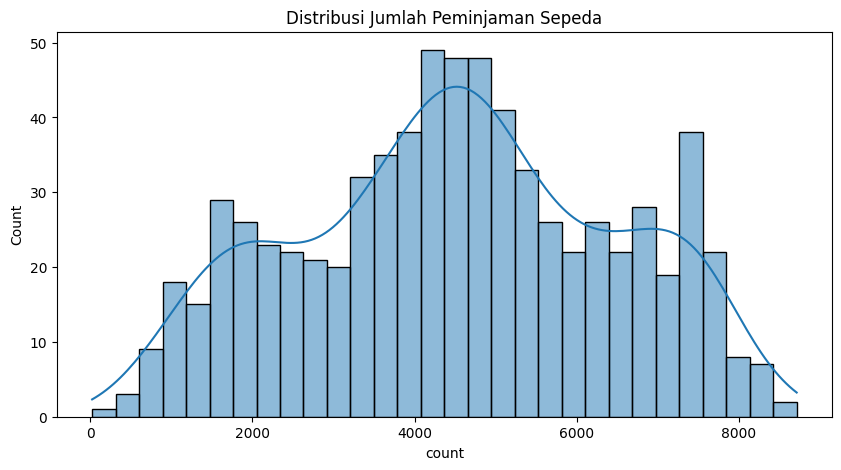

In [5]:
# Menampilkan distribusi jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.histplot(df_day['count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Terdapat fluktuasi jumlah peminjaman yang mencolok, dengan jumlah tertinggi pada beberapa periode tertentu.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

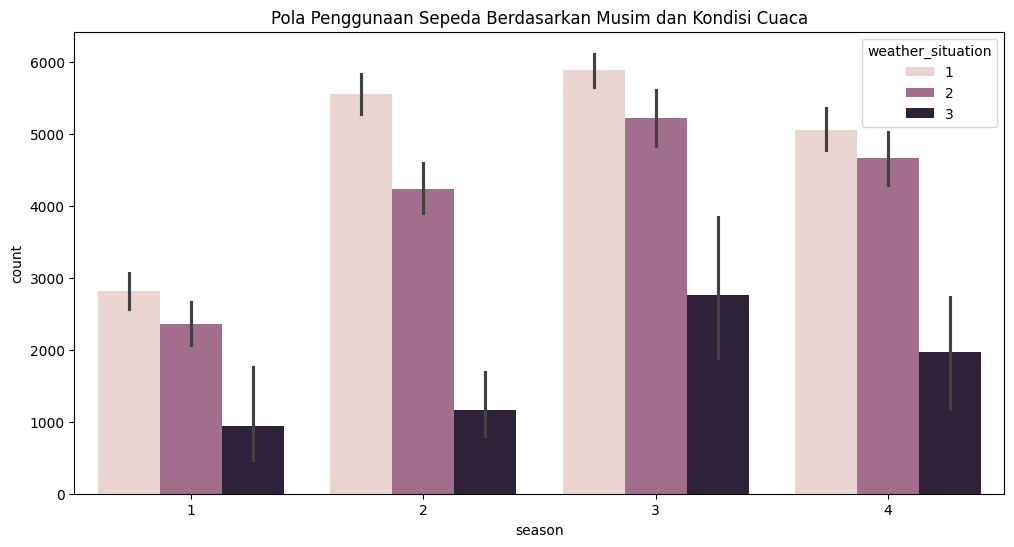

In [6]:
# Visualisasi pengaruh musim terhadap jumlah peminjaman sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', data=df_day, hue='weather_situation')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca')
plt.show()

### Pertanyaan 2: Pada jam berapa dan hari apa penggunaan sepeda paling tinggi?

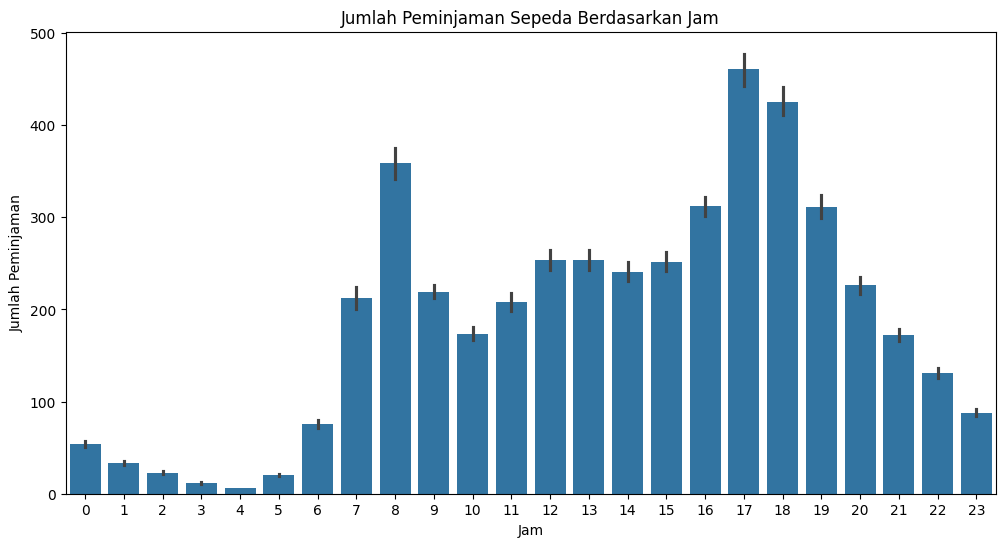

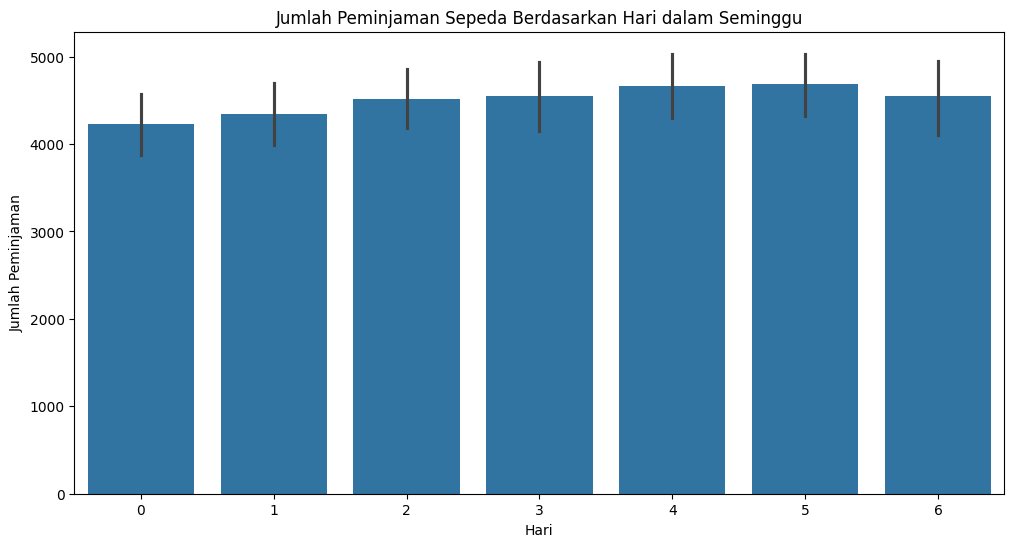

In [7]:
# Menganalisis peminjaman sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=df_hour)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Menganalisis peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='count', data=df_day)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Musim Gugur (Fall) menunjukkan tingkat penyewaan tertinggi, terutama pada kondisi cuaca cerah.
- Peminjaman sepeda mencapai puncaknya pada sore hari (jam 17) dan di hari Jumat.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [8]:
# RFM analysis untuk mengukur perilaku pelanggan
# Recency: Menghitung hari terakhir pengguna meminjam sepeda
df_day['dateday'] = pd.to_datetime(df_day['dateday'])
recent_date = df_day['dateday'].max()
df_day['recency'] = (recent_date - df_day['dateday']).dt.days

# Frequency: Menghitung jumlah peminjaman per pengguna
df_day['frequency'] = df_day.groupby('registered')['count'].transform('sum')

# Monetary: Menghitung nilai peminjaman per pengguna (total penyewaan)
df_day['monetary'] = df_day.groupby('registered')['count'].transform('sum')

# Menampilkan RFM metrics
rfm_df = df_day[['recency', 'frequency', 'monetary']].drop_duplicates()
print(rfm_df.head())

   recency  frequency  monetary
0      730        985       985
1      729        801       801
2      728       1349      1349
3      727       3088      3088
4      726       3206      3206


**Insight:**
- RFM analysis memberikan gambaran tentang perilaku pengguna berdasarkan waktu terakhir peminjaman, frekuensi peminjaman, dan total jumlah penyewaan.

## Conclusion

- Musim Gugur (Fall) dan cuaca cerah cenderung meningkatkan jumlah peminjaman sepeda.
- Penggunaan sepeda paling tinggi terjadi pada sore hari (17:00) dan pada hari Jumat.

## Save Dataset

In [9]:
df_day.to_csv("day_clean.csv", index=False)

In [10]:
df_hour.to_csv("hour_clean.csv", index=False)